# Partie A: Descente de gradient

### 1. Calcule de l’expression analytique de la fonction

On considère la fonction dont l'expression analytique est le suivante:

![image](images/fact.png)

Sa dérivée:
![image](images/ePrime.png)

### Visualisation

In [1]:
from matplotlib import pyplot as plt

In [1]:
def E(xliste):
    """ E prend une list des x et calcul
        y = E(x)
    """
    y=[]
    for x in xliste:
         y.append(x**4 - 11*(x**3) + 41*(x**2) - 61*x + 30)
    return y

In [2]:
def Eprime(xliste):
    """ Eprime prend une list des x et calcul
        y = E'(x)
    """
    y=[]
    for x in xliste:
         y.append(4*(x**3) - 33*(x**2) + 82*x - 61)
    return y

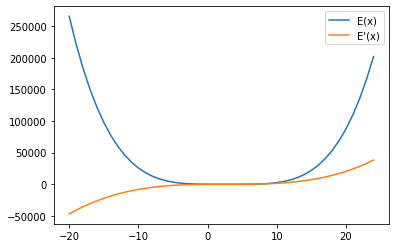

In [4]:
x = [i for i in range(-20, 25)]
y = E(x) 
yPrime = Eprime(x)
plt.plot(x,y, label="E(x)")
plt.plot(x,yPrime, label="E'(x)")
plt.legend()
plt.show()

### 2. Implémentation de l’algorithme DG sous Python pour la fonction E(x).

In [3]:
def EprimeX(x):
    """ EprimeX prend une x et calcul
        y = E'(x)
    """
    res = 4*(x**3) - 33*(x**2) + 82*x - 61
    return res

def GD(nbrMax, epsilon, nu, x0):
    """ Gradient Descent
    
        nu: learning rate
        epsilon: taux de convergence (quand on doit s'arréter)
        nbrMax: Nombre maximal d'itérations
        x0: x de départ
    """
    x = x0 - nu * EprimeX(x0)
    i = 1
    while abs(x-x0)>epsilon and i < nbrMax:
        x0 = x
        x = x0 - nu * EprimeX(x0)
        i += 1
    return (x,i)

In [4]:
def Ex(x):
    """ E prend une x et calcul
        y = E(x)
    """
    return (x**4 - 11*(x**3) + 41*(x**2) - 61*x + 30)

### 3. Teste de l’algorithme implémenté 
Pour comprendre ce que fait effectivement la DG, testez l’algorithme implémenté en
utilisant des exemples d’exécutions avec des valeurs initiales de x0 et η suivantes :

###### • x0 = 5 et η = 0.001

In [5]:
xMin, nbr_Iter = GD(nbrMax=1000, epsilon=0.01, nu=0.001, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)

Le minimum en xMin= 4.661483315686318 est: E(xMin) -5.480963002094427
Nombre d'iterations: 22


###### • x0 = 5 et η = 0.01

In [8]:
xMin, nbr_Iter = GD(nbrMax=1000, epsilon=0.01, nu=0.01, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)

Le minimum en xMin= 4.361008294913719 est: E(xMin) -6.9011757851308175
Nombre d'iterations: 10


On augument le learning rate est le nombre d'iteration diminue!

###### • x0 = 5 et η = 0.1

In [9]:
xMin, nbr_Iter = GD(nbrMax=1000, epsilon=0.01, nu=0.1, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)

Le minimum en xMin= 4.104990789406397 est: E(xMin) -6.463930507818446
Nombre d'iterations: 1000


On augument le learning rate est le nombre d'iteration augument!

###### • x0 = 5 et η = 0.17

In [10]:
xMin, nbr_Iter = GD(nbrMax=1000, epsilon=0.01, nu=0.17, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)

Le minimum en xMin= 1.65839377699626 est: E(xMin) -1.0083047800537628
Nombre d'iterations: 1000


Un changement brusque de learning rate change le min!

###### • x0 = 5 et η = 1

In [ ]:
xMin, nbr_Iter = GD(nbrMax=1000, epsilon=0.01, nu=1, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)

Mauvais learning rate! ne donne pas de resultat!

###### • x0 = 5 et η = 0.001

In [11]:
xMin, nbr_Iter = GD(nbrMax=1000, epsilon=0.01, nu=0.001, x0=0)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)

Le minimum en xMin= 0.9494071180705481 est: E(xMin) 0.44149105986255677
Nombre d'iterations: 39


On constate ce learning rate est très bon! 

###### 5. Visualisation l’évolution des minimums de la fonction E(x) trouvés au cours des itérations.

In [12]:
def GDvisualise(nbrMax, epsilon, nu, x0):
    x = x0 - nu * EprimeX(x0)
    i = 1
    plt.scatter(x, Ex(x))
    while abs(x-x0)>epsilon and i < nbrMax:
        x0 = x
        x = x0 - nu * EprimeX(x0)
        i += 1
        plt.scatter(x, Ex(x))
    return (x,i)

###### • x0 = 5 et η = 0.01

Le minimum en xMin= 4.661483315686318 est: E(xMin) -5.480963002094427
Nombre d'iterations: 22


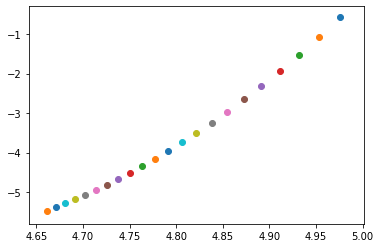

In [13]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.01, nu=0.001, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

Le minimum en xMin= 4.361008294913719 est: E(xMin) -6.9011757851308175
Nombre d'iterations: 10


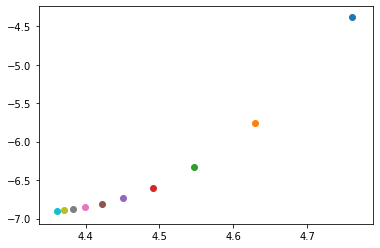

In [14]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.01, nu=0.01, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

Le minimum en xMin= 4.361008294913719 est: E(xMin) -6.9011757851308175
Nombre d'iterations: 10


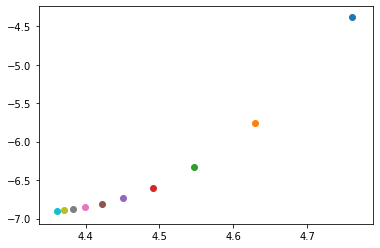

In [9]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.01, nu=0.01, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

Le minimum en xMin= 4.104990789406397 est: E(xMin) -6.463930507818446
Nombre d'iterations: 1000


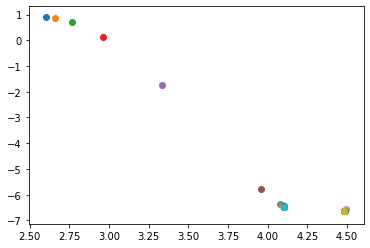

In [10]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.01, nu=0.1, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

Le minimum en xMin= 0.9494071180705481 est: E(xMin) 0.44149105986255677
Nombre d'iterations: 39


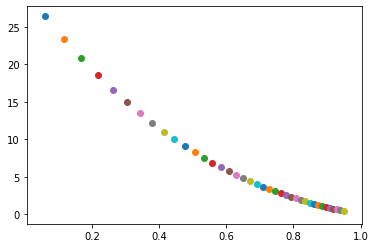

In [11]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.01, nu=0.001, x0=0)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

###### 6. Testez votre algorithme avec d’autres valeurs de η et nombremax

Le minimum en xMin= 4.370577525346989 est: E(xMin) -6.892937417071266
Nombre d'iterations: 106


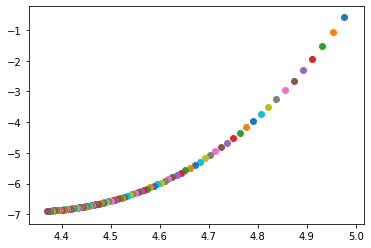

In [12]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.001, nu=0.001, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

Le minimum en xMin= 1.3250572235390383 est: E(xMin) -1.3504463343684279
Nombre d'iterations: 151


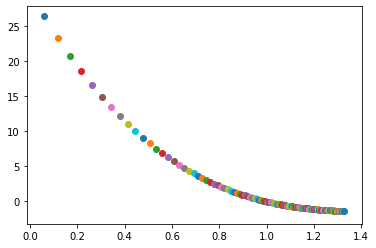

In [13]:
xMin, nbr_Iter = GDvisualise(nbrMax=1000, epsilon=0.001, nu=0.001, x0=0)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

Le minimum en xMin= 4.104990789406397 est: E(xMin) -6.463930507818446
Nombre d'iterations: 4000


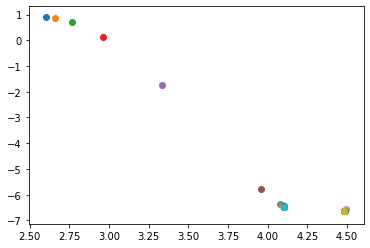

In [19]:
xMin, nbr_Iter = GDvisualise(nbrMax=4000, epsilon=0.01, nu=0.1, x0=5)
print("Le minimum en xMin=", xMin,"est: E(xMin)", Ex(xMin))
print("Nombre d'iterations:", nbr_Iter)
plt.show()

# <p style="text-align: center">Merci pour votre lecture!</p>